In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate
#from brokenaxes import brokenaxes
import zipfile
from venn import venn
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
ExpZ2 = pd.read_csv("../dat/allen-mouse-exp/AllenMouseBrain_Z2bias.csv", index_col=0)

## Stage1+2 SPARK data

In [437]:
Spark_Meta_2stage = pd.read_excel("../dat/genes/asd/TabS_DenovoWEST_Stage1+2.xlsx",
                           skiprows=2, sheet_name="TopDnEnrich")
Spark_Meta_ExomeWide = Spark_Meta_2stage[Spark_Meta_2stage["pDenovoWEST_Meta"]<=1.3e-6]
print(Spark_Meta_ExomeWide.shape)
Spark_Meta_2 = Spark_Meta_2stage[Spark_Meta_2stage["pDenovoWEST_Meta"]<=1e-3]
print(Spark_Meta_2.shape)
Spark_Meta_3 = Spark_Meta_2stage[Spark_Meta_2stage["pDenovoWEST_Meta"]<=1e-2]
print(Spark_Meta_3.shape)

(61, 67)
(131, 67)
(159, 67)


In [442]:
_, ASD_GeneW_ExomeWide = Aggregate_Gene_Weights2(Spark_Meta_ExomeWide, 
          allen_mouse_genes = ExpZ2.index.values)
len(ASD_GeneW_ExomeWide)
_, ASD_GeneW_2 = Aggregate_Gene_Weights2(Spark_Meta_2, 
          allen_mouse_genes = ExpZ2.index.values)
len(ASD_GeneW_2)
_, ASD_GeneW_3 = Aggregate_Gene_Weights2(Spark_Meta_3, 
          allen_mouse_genes = ExpZ2.index.values)
len(ASD_GeneW_3)

23126 not in allen mouse dataset
23126 not in allen mouse dataset
7314 not in allen mouse dataset
2290 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
90167 not in allen mouse dataset
23126 not in allen mouse dataset
7314 not in allen mouse dataset
2290 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
23392 not in allen mouse dataset
90167 not in allen mouse dataset
293 not in allen mouse dataset
58491 not in allen mouse dataset


159

In [439]:
ASD_ExomeWide = AvgSTRZ_Weighted(ExpZ2, ASD_GeneW_ExomeWide, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.EW.Z2.csv")
D_Agg_avgZ_RD = RegionDistributions(ASD_ExomeWide.set_index("STR"), show=True, topN=50)

Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Dorsal_peduncular_area; Piriform_area
Isocortex 	 20 	 Orbital_area_lateral_part; Prelimbic_area; Primary_somatosensory_area_lower_limb; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Retrosplenial_area_lateral_agranular_part; Primary_visual_area; Primary_motor_area; Secondary_motor_area; Visceral_area; Anterior_cingulate_area_dorsal_part; Posterior_parietal_association_areas; Lateral_visual_area; Agranular_insular_area_posterior_part; Primary_somatosensory_area_trunk; Gustatory_areas; Agranular_insular_area_ventral_part; posteromedial_visual_area; Supplemental_somatosensory_area
Striatum 	 5 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part
Amygdalar 	 3 	 Lateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Intercalated_amygdalar_nucleus
Midbrain 	 1 	 Anterior_pretectal_nucleus
Pall

In [440]:
ASD_2 = AvgSTRZ_Weighted(ExpZ2, ASD_GeneW_2, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.131.Z2.csv")
D_Agg_avgZ_RD = RegionDistributions(ASD_2.set_index("STR"), show=True, topN=50)

Olfactory_areas 	 3 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb
Isocortex 	 21 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Primary_somatosensory_area_lower_limb; Anteromedial_visual_area; Primary_visual_area; Anterior_cingulate_area_dorsal_part; Secondary_motor_area; Primary_motor_area; Retrosplenial_area_lateral_agranular_part; Agranular_insular_area_ventral_part; Anterior_cingulate_area_ventral_part; Posterior_parietal_association_areas; Primary_somatosensory_area_trunk; Orbital_area_medial_part; Gustatory_areas; posteromedial_visual_area; Lateral_visual_area; Primary_somatosensory_area_upper_limb; Visceral_area
Striatum 	 4 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_ventral_part
Amygdalar 	 3 	 Lateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Intercalated_amygdalar_nucleus
Midbrain 	 1 	 Anterior_pretectal_nucleus
Pallidum 	

In [443]:
ASD_3 = AvgSTRZ_Weighted(ExpZ2, ASD_GeneW_3, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.159.Z2.csv")
D_Agg_avgZ_RD = RegionDistributions(ASD_3.set_index("STR"), show=True, topN=50)

Olfactory_areas 	 3 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb
Isocortex 	 22 	 Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Prelimbic_area; Infralimbic_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Anteromedial_visual_area; Primary_motor_area; Secondary_motor_area; Agranular_insular_area_ventral_part; Retrosplenial_area_lateral_agranular_part; Anterior_cingulate_area_dorsal_part; Gustatory_areas; Primary_somatosensory_area_trunk; Posterior_parietal_association_areas; Visceral_area; Lateral_visual_area; Primary_somatosensory_area_upper_limb; Orbital_area_medial_part; posteromedial_visual_area; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part
Striatum 	 4 	 Nucleus_accumbens; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_ventral_part
Amygdalar 	 3 	 Lateral_amygdalar_nucleus; Basomedial_amygdalar_nucleus; Intercalated_amygdalar_nucleus
Midbrain 	 1 

## Spark Stage 1 data

In [4]:
Spark_Meta_1stage = pd.read_excel("~/Work/SPARK2020/TabS_DenovoWEST_Stage1.xlsx",
                           skiprows=1, sheet_name="AllGenes")
#Spark_Meta_1stage = Spark_Meta_1stage.astype({'pDenovoWEST':'float'}, errors='coerce')
#Spark_Meta_1stage[Spark_Meta_1stage.apply(pd.to_numeric, errors='coerce').notna()].dropna()

In [5]:
Spark_Meta_1stage = Spark_Meta_1stage[Spark_Meta_1stage.pDenovoWEST != "."]
Spark_Meta_1stage = Spark_Meta_1stage.astype({'pDenovoWEST':'float'}, errors='ignore')

In [6]:
Spark_1stage_lv1 = Spark_Meta_1stage[Spark_Meta_1stage["pDenovoWEST"]<=1.3e-6]
print(Spark_1stage_lv1.shape)
Spark_1stage_lv2 = Spark_Meta_1stage[Spark_Meta_1stage["pDenovoWEST"]<=1e-3]
print(Spark_1stage_lv2.shape)
Spark_1stage_lv3 = Spark_Meta_1stage[Spark_Meta_1stage["pDenovoWEST"]<=1e-2]
print(Spark_1stage_lv3.shape)
Spark_1stage_lv4 = Spark_Meta_1stage.head(1292)
print(Spark_1stage_lv4.shape)

(46, 50)
(160, 50)
(676, 50)
(1292, 50)


In [7]:
_, GW_Spark_1stage_lv1 = Aggregate_Gene_Weights2(Spark_1stage_lv1, 
          allen_mouse_genes = ExpZ2.index.values, out="../dat/Unionize_bias/GeneWeights/asd.46.gw.csv")
len(GW_Spark_1stage_lv1)
_, GW_Spark_1stage_lv2 = Aggregate_Gene_Weights2(Spark_1stage_lv2, 
          allen_mouse_genes = ExpZ2.index.values, out="../dat/Unionize_bias/GeneWeights/asd.160.gw.csv")
len(GW_Spark_1stage_lv2)
_, GW_Spark_1stage_lv3 = Aggregate_Gene_Weights2(Spark_1stage_lv3, 
          allen_mouse_genes = ExpZ2.index.values, out="../dat/Unionize_bias/GeneWeights/asd.676.gw.csv")
len(GW_Spark_1stage_lv3)
_, GW_Spark_1stage_lv4 = Aggregate_Gene_Weights2(Spark_1stage_lv4, 
          allen_mouse_genes = ExpZ2.index.values, out="../dat/Unionize_bias/GeneWeights/asd.1292.gw.csv")
len(GW_Spark_1stage_lv4)

23126 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
54578 not in allen mouse dataset
6339 not in allen mouse dataset
64073 not in allen mouse dataset
284355 not in allen mouse dataset
22900 not in allen mouse dataset
85236 not in allen mouse dataset
252884 not in allen mouse dataset
1551 not in allen mouse dataset
731220 not in allen mouse dataset
65057 not in allen mouse dataset
55761 not in allen mouse dataset
4620 not in allen mouse dataset
140687 not in allen mouse d

1186

In [15]:
GeneSetSizes = [30, 60, 100, 200, 300, 400, 500, 600, 800, 1000, 2000, 5000, 10000]
for NGenes in GeneSetSizes:
    _, GW_Spark_1stage = Aggregate_Gene_Weights2(Spark_Meta_1stage.head(NGenes), 
                                                 allen_mouse_genes = ExpZ2.index.values)
    Dict2Fil(GW_Spark_1stage, "/home/jw3514/Work/CellType_Psy/dat3/GeneWeights/ASD.top{}.gw.csv".format(NGenes))

23126 not in allen mouse dataset
23126 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
54578 not in allen mouse dataset
6339 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
54578 not in allen mouse dataset
6339 not in allen mouse dataset
64073 not in allen mouse dataset
284355 not in allen mouse dataset
22900 not in allen mouse dataset
85236 not in allen

221786 not in allen mouse dataset
147694 not in allen mouse dataset
9997 not in allen mouse dataset
161882 not in allen mouse dataset
126326 not in allen mouse dataset
1120 not in allen mouse dataset
88455 not in allen mouse dataset
425054 not in allen mouse dataset
283316 not in allen mouse dataset
554250 not in allen mouse dataset
339779 not in allen mouse dataset
341019 not in allen mouse dataset
387778 not in allen mouse dataset
7574 not in allen mouse dataset
3730 not in allen mouse dataset
10520 not in allen mouse dataset
145497 not in allen mouse dataset
121549 not in allen mouse dataset
7062 not in allen mouse dataset
283685 not in allen mouse dataset
340267 not in allen mouse dataset
574432 not in allen mouse dataset
114043 not in allen mouse dataset
389273 not in allen mouse dataset
285679 not in allen mouse dataset
653203 not in allen mouse dataset
23101 not in allen mouse dataset
400713 not in allen mouse dataset
23119 not in allen mouse dataset
23063 not in allen mouse dat

133558 not in allen mouse dataset
725 not in allen mouse dataset
55208 not in allen mouse dataset
7760 not in allen mouse dataset
7592 not in allen mouse dataset
29964 not in allen mouse dataset
4648 not in allen mouse dataset
6899 not in allen mouse dataset
7770 not in allen mouse dataset
6712 not in allen mouse dataset
911 not in allen mouse dataset
63982 not in allen mouse dataset
284498 not in allen mouse dataset
386680 not in allen mouse dataset
9928 not in allen mouse dataset
285349 not in allen mouse dataset
164284 not in allen mouse dataset
654463 not in allen mouse dataset
152110 not in allen mouse dataset
115653 not in allen mouse dataset
23091 not in allen mouse dataset
5138 not in allen mouse dataset
23126 not in allen mouse dataset
3008 don't have pLI score on file, set to 0
23096 not in allen mouse dataset
7314 not in allen mouse dataset
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
54578 

284498 not in allen mouse dataset
386680 not in allen mouse dataset
9928 not in allen mouse dataset
285349 not in allen mouse dataset
164284 not in allen mouse dataset
654463 not in allen mouse dataset
152110 not in allen mouse dataset
115653 not in allen mouse dataset
23091 not in allen mouse dataset
5138 not in allen mouse dataset
9447 not in allen mouse dataset
388960 not in allen mouse dataset
84874 not in allen mouse dataset
8838 not in allen mouse dataset
9824 not in allen mouse dataset
121391 not in allen mouse dataset
3217 not in allen mouse dataset
1584 not in allen mouse dataset
285613 not in allen mouse dataset
57701 not in allen mouse dataset
57615 not in allen mouse dataset
203260 not in allen mouse dataset
3004 not in allen mouse dataset
153478 not in allen mouse dataset
5994 not in allen mouse dataset
283116 not in allen mouse dataset
89795 not in allen mouse dataset
285533 not in allen mouse dataset
90525 not in allen mouse dataset
55613 not in allen mouse dataset
28509

In [9]:
Bias_Spark_1stage_lv1 = AvgSTRZ_Weighted(ExpZ2, GW_Spark_1stage_lv1, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.1stage.lv1.Z2.csv")
Bias_Spark_1stage_lv2 = AvgSTRZ_Weighted(ExpZ2, GW_Spark_1stage_lv2, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.1stage.lv2.Z2.csv")
Bias_Spark_1stage_lv3 = AvgSTRZ_Weighted(ExpZ2, GW_Spark_1stage_lv3, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.1stage.lv3.Z2.csv")
Bias_Spark_1stage_lv4 = AvgSTRZ_Weighted(ExpZ2, GW_Spark_1stage_lv4, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.ASD.1stage.lv4.Z2.csv")

In [10]:
Bias_Spark_1stage_lv4.head(10)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.250740,Hippocampus,1
Infralimbic_area,0.233872,Isocortex,2
Dorsal_peduncular_area,0.228488,Olfactory_areas,3
Orbital_area_ventrolateral_part,0.225550,Isocortex,4
Nucleus_accumbens,0.220354,Striatum,5
Orbital_area_lateral_part,0.214761,Isocortex,6
Prelimbic_area,0.214005,Isocortex,7
Field_CA1,0.210901,Hippocampus,8
Anterior_olfactory_nucleus,0.204002,Olfactory_areas,9


<AxesSubplot: >

<Figure size 720x480 with 0 Axes>

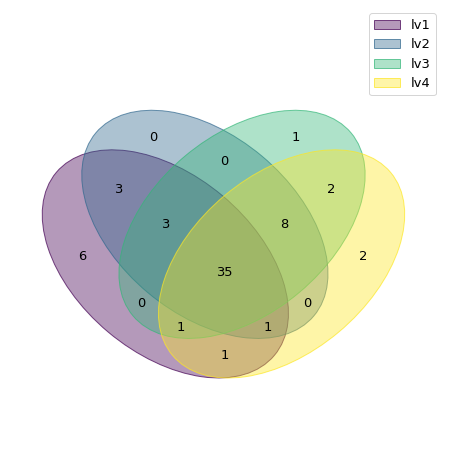

In [12]:
dat_dict = {"lv1": set(Bias_Spark_1stage_lv1.head(50).index.values), 
            "lv2":set(Bias_Spark_1stage_lv2.head(50).index.values),
            "lv3":set(Bias_Spark_1stage_lv3.head(50).index.values),
            "lv4":set(Bias_Spark_1stage_lv4.head(50).index.values)}
plt.figure(dpi=120)
venn(dat_dict)

In [ ]:
for xx in [Bias_Spark_1stage_lv1, Bias_Spark_1stage_lv2, Bias_Spark_1stage_lv3, Bias_Spark_1stage_lv4]:
    top50_bias = xx.head(50)["EFFECT"].mean()
    print(top50_bias)

#### Slice

In [57]:
tmp_mut_df = Spark_Meta_1stage.head(1000).tail(900)
_, tmp_asd_gw = Aggregate_Gene_Weights2(tmp_mut_df, 
                                                 allen_mouse_genes = ExpZ2.index.values)
tmp_ASD_DF = AvgSTRZ_Weighted(ExpZ2, tmp_asd_gw, Method = 1)

2290 don't have pLI score on file, set to 0
293 not in allen mouse dataset
90167 not in allen mouse dataset
23392 not in allen mouse dataset
58491 not in allen mouse dataset
54578 not in allen mouse dataset
6339 not in allen mouse dataset
64073 not in allen mouse dataset
284355 not in allen mouse dataset
22900 not in allen mouse dataset
85236 not in allen mouse dataset
252884 not in allen mouse dataset
1551 not in allen mouse dataset
731220 not in allen mouse dataset
65057 not in allen mouse dataset
55761 not in allen mouse dataset
4620 not in allen mouse dataset
140687 not in allen mouse dataset
92129 not in allen mouse dataset
8363 not in allen mouse dataset
126017 not in allen mouse dataset
54979 not in allen mouse dataset
84527 not in allen mouse dataset
54776 not in allen mouse dataset
80128 not in allen mouse dataset
55565 not in allen mouse dataset
50488 not in allen mouse dataset
83483 not in allen mouse dataset
8532 not in allen mouse dataset
8361 not in allen mouse dataset
14

In [60]:
print(RegionDistributionsList(tmp_ASD_DF.head(50).index.values))

Hippocampus	8	Field_CA1; Dentate_gyrus; Field_CA2; Subiculum_dorsal_part; Field_CA3; Presubiculum; Postsubiculum; Subiculum_ventral_part
Olfactory_areas	5	Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Taenia_tecta; Main_olfactory_bulb
Midbrain	1	Inferior_colliculus_central_nucleus
Striatum	6	Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Nucleus_accumbens; Lateral_septal_nucleus_caudal_caudodorsal_part; Septofimbrial_nucleus; Lateral_septal_nucleus_ventral_part
Thalamus	7	Anteromedial_nucleus_ventral_part; Anteromedial_nucleus_dorsal_part; Parataenial_nucleus; Paraventricular_nucleus_of_the_thalamus; Central_lateral_nucleus_of_the_thalamus; Lateral_posterior_nucleus_of_the_thalamus; Medial_geniculate_complex_dorsal_part
Amygdala	3	Basolateral_amygdalar_nucleus; Intercalated_amygdalar_nucleus; Posterior_amygdalar_nucleus
Isocortex	16	Infralimbic_area; Orbital_area_ventrolateral_part; Frontal_pole_cerebral_cortex; Prelimbic_area; Retrospl

#### N Genes vs Biases

In [17]:
GeneSetSizes = [30, 60, 100, 200, 300, 400, 500, 600, 800, 1000, 2000, 5000, 10000]
ASD_DFs = []
SCZ_DFs = []
GW_DIR = "/home/jw3514/Work/CellType_Psy/dat3/GeneWeights/"
for NGenes in GeneSetSizes:
    print(NGenes)
    asd_gw = Fil2Dict("{}/ASD.top{}.gw.csv".format(GW_DIR, NGenes))
    scz_gw = Fil2Dict("{}/SCZ.top{}.gw.csv".format(GW_DIR, NGenes))
    ASD_DF = AvgSTRZ_Weighted(ExpZ2, asd_gw, Method = 1)
    SCZ_DF = AvgSTRZ_Weighted(ExpZ2, scz_gw, Method = 1)
    ASD_DFs.append(ASD_DF)
    SCZ_DFs.append(SCZ_DF)
    

30
60
100
200
300
400
500
600
800
1000
2000
5000
10000


In [55]:
ASD_DFs[8].head(10)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.293406,Hippocampus,1
Field_CA1,0.272380,Hippocampus,2
Orbital_area_ventrolateral_part,0.266020,Isocortex,3
Nucleus_accumbens,0.264181,Striatum,4
Infralimbic_area,0.261733,Isocortex,5
Orbital_area_lateral_part,0.258881,Isocortex,6
Dorsal_peduncular_area,0.258286,Olfactory_areas,7
Prelimbic_area,0.251286,Isocortex,8
Anterior_olfactory_nucleus,0.244436,Olfactory_areas,9


In [62]:
SCZ_DFs[1].head(50)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.460035,Hippocampus,1
Lateral_septal_nucleus_caudal_caudodorsal_part,0.449341,Striatum,2
Retrosplenial_area_lateral_agranular_part,0.391799,Isocortex,3
Field_CA1,0.377878,Hippocampus,4
Lateral_visual_area,0.371726,Isocortex,5
Medial_amygdalar_nucleus,0.371563,Amygdala,6
Cortical_amygdalar_area_posterior_part,0.341950,Amygdala,7
Lateral_septal_nucleus_rostral_rostroventral_part,0.326717,Striatum,8
Anteromedial_visual_area,0.299758,Isocortex,9


In [18]:
ASD_Bias_top50 = []
SCZ_Bias_top50 = []
for DF in ASD_DFs:
    mean_abs_bias = np.mean([abs(x) for x in DF.head(50)["EFFECT"].values])
    ASD_Bias_top50.append(mean_abs_bias)
for DF in SCZ_DFs:
    mean_abs_bias = np.mean([abs(x) for x in DF.head(50)["EFFECT"].values])
    SCZ_Bias_top50.append(mean_abs_bias)

In [27]:
Sib_DFs = []
Sib_NG_MeanBias = []
for NG in GeneSetSizes:
    tmp_SCZ_Sim_dir = "../dat/Unionize_bias/RandGene_Bias/RandGene.{}.SCZ.OR/".format(NG)
    tmp_rand_mean_abs_biases = []
    for file in os.listdir(tmp_SCZ_Sim_dir):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(tmp_SCZ_Sim_dir+file, index_col="STR")
        mean_abs_bias = np.mean([abs(x) for x in df.head(50)["EFFECT"].values])
        tmp_rand_mean_abs_biases.append(mean_abs_bias)
    Sib_NG_MeanBias.append(tmp_rand_mean_abs_biases)

In [34]:
Sib_DFs2 = []
Sib_NG_MeanBias2 = []
for NG in GeneSetSizes:
    tmp_SCZ_Sim_dir = "../dat/Unionize_bias/RandGene_Bias/RandGene.{}.ASD.OR/".format(NG)
    tmp_rand_mean_abs_biases = []
    for file in os.listdir(tmp_SCZ_Sim_dir):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(tmp_SCZ_Sim_dir+file, index_col="STR")
        mean_abs_bias = np.mean([abs(x) for x in df.head(50)["EFFECT"].values])
        tmp_rand_mean_abs_biases.append(mean_abs_bias)
    Sib_NG_MeanBias2.append(tmp_rand_mean_abs_biases)

In [35]:
Sib_NG_MeanBias = np.array(Sib_NG_MeanBias)
Sib_NG_MeanBias.shape

Sib_NG_MeanBias2 = np.array(Sib_NG_MeanBias2)
Sib_NG_MeanBias2.shape

(13, 1000)

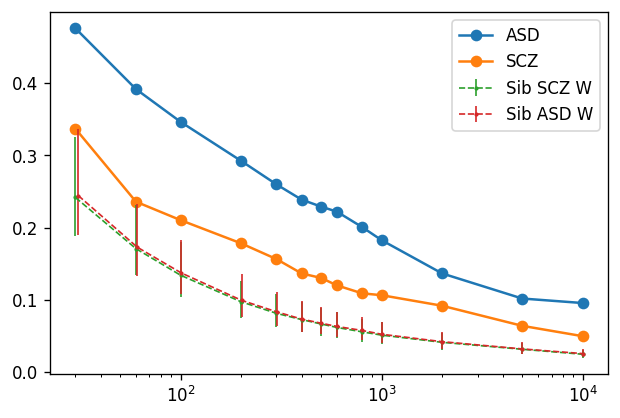

In [46]:
plt.figure(dpi=120)
GeneSetSizes = np.array(GeneSetSizes)
plt.plot(GeneSetSizes, ASD_Bias_top50, label="ASD", marker="o")
plt.plot(GeneSetSizes, SCZ_Bias_top50, label="SCZ", marker="o")


#BarLen = 34.1
BarLen = 47.5
lower = np.percentile(Sib_NG_MeanBias, 50-BarLen, axis=1)
upper = np.percentile(Sib_NG_MeanBias, 50+BarLen, axis=1)
mean = np.median(Sib_NG_MeanBias, axis=1)
plt.errorbar(GeneSetSizes, mean, marker="o", markersize=1.5, lw=1,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Sib SCZ W")

lower = np.percentile(Sib_NG_MeanBias2, 50-BarLen, axis=1)
upper = np.percentile(Sib_NG_MeanBias2, 50+BarLen, axis=1)
mean = np.median(Sib_NG_MeanBias2, axis=1)
plt.errorbar(GeneSetSizes+1, mean, marker="o", markersize=1.5, lw=1,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Sib ASD W")


plt.legend()
plt.xscale("log")
plt.show()

### Siblings

In [280]:
SiblingDF = pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/sibling_weights_LGD_Dmis.csv", header=None, 
                       names=["g", "w"])
SiblingDF.head(5)

,g,w
0,10765,2.337
1,7273,1.674
2,6263,1.386
3,23345,1.125
4,23216,0.981


In [281]:
#46 160 676 10137
tmpdf = SiblingDF.head(46)
GW_sib_lv1 = dict(zip(tmpdf["g"].values, tmpdf["w"].values))
tmpdf = SiblingDF.head(160)
GW_sib_lv2 = dict(zip(tmpdf["g"].values, tmpdf["w"].values))
tmpdf = SiblingDF.head(676)
GW_sib_lv3 = dict(zip(tmpdf["g"].values, tmpdf["w"].values))
tmpdf = SiblingDF.head(10137)
GW_sib_lv4 = dict(zip(tmpdf["g"].values, tmpdf["w"].values))
print(len(GW_sib_lv1),len(GW_sib_lv2),len(GW_sib_lv3),len(GW_sib_lv4))

46 160 676 1292


In [282]:
out = "../dat/Unionize_bias/GeneWeights/sib.46.gw.csv"
writer = csv.writer(open(out, 'wt'))
for k,v in sorted(GW_sib_lv1.items(), key=lambda x:x[1], reverse=True):
    writer.writerow([k,v])
out = "../dat/Unionize_bias/GeneWeights/sib.160.gw.csv"    
writer = csv.writer(open(out, 'wt'))
for k,v in sorted(GW_sib_lv2.items(), key=lambda x:x[1], reverse=True):
    writer.writerow([k,v])
out = "../dat/Unionize_bias/GeneWeights/sib.676.gw.csv"    
writer = csv.writer(open(out, 'wt'))
for k,v in sorted(GW_sib_lv3.items(), key=lambda x:x[1], reverse=True):
    writer.writerow([k,v])
out = "../dat/Unionize_bias/GeneWeights/sib.1292.gw.csv"    
writer = csv.writer(open(out, 'wt'))
for k,v in sorted(GW_sib_lv4.items(), key=lambda x:x[1], reverse=True):
    writer.writerow([k,v])

In [283]:
Bias_sib_lv1 = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv1, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.lv1.Z2.csv")
Bias_sib_lv2 = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv2, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.lv2.Z2.csv")
Bias_sib_lv3 = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv3, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.lv3.Z2.csv")
Bias_sib_lv4 = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv4, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.lv4.Z2.csv")

In [284]:
for xx in [Bias_sib_lv1, Bias_sib_lv2, Bias_sib_lv3, Bias_sib_lv4]:
    top50_bias = xx.head(50)["EFFECT"].mean()
    print(top50_bias)

0.20965906001524337
0.14036261462798366
0.07405279607548762
0.06721883708519998


<AxesSubplot:>

<Figure size 720x480 with 0 Axes>

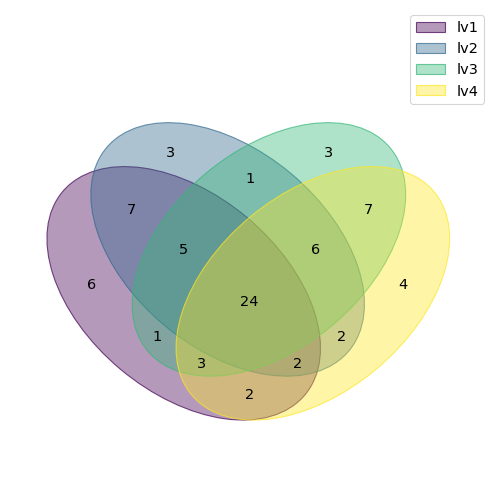

In [285]:
dat_dict = {"lv1": set(Bias_sib_lv1.head(50)["STR"].values), 
            "lv2":set(Bias_sib_lv2.head(50)["STR"].values),
            "lv3":set(Bias_sib_lv3.head(50)["STR"].values),
            "lv4":set(Bias_sib_lv4.head(50)["STR"].values)}
plt.figure(dpi=120)
venn(dat_dict)

##### Sibling with asd bias transfer

In [286]:
GW_sib_lv1_wt = dict(zip(tmpdf["g"].values, sorted(GW_Spark_1stage_lv1.values(), reverse=True)))
tmpdf = SiblingDF.head(160)
GW_sib_lv2_wt = dict(zip(tmpdf["g"].values, sorted(GW_Spark_1stage_lv2.values(), reverse=True)))
tmpdf = SiblingDF.head(676)
GW_sib_lv3_wt = dict(zip(tmpdf["g"].values, sorted(GW_Spark_1stage_lv3.values(), reverse=True)))
tmpdf = SiblingDF.head(10137)
GW_sib_lv4_wt = dict(zip(tmpdf["g"].values, sorted(GW_Spark_1stage_lv4.values(), reverse=True)))

In [287]:
Bias_sib_lv1_wt = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv1_wt, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.wt.lv1.Z2.csv")
Bias_sib_lv2_wt = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv2_wt, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.wt.lv2.Z2.csv")
Bias_sib_lv3_wt = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv3_wt, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.wt.lv3.Z2.csv")
Bias_sib_lv4_wt = AvgSTRZ_Weighted(ExpZ2, GW_sib_lv4_wt, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/test.sib.wt.lv4.Z2.csv")

In [288]:
for xx in [Bias_sib_lv1_wt, Bias_sib_lv2_wt, Bias_sib_lv3_wt, Bias_sib_lv4_wt]:
    top50_bias = xx.head(50)["EFFECT"].mean()
    print(top50_bias)

0.21431409934576753
0.1683642756151826
0.10876398494737162
0.09038013566700802


<AxesSubplot:>

<Figure size 720x480 with 0 Axes>

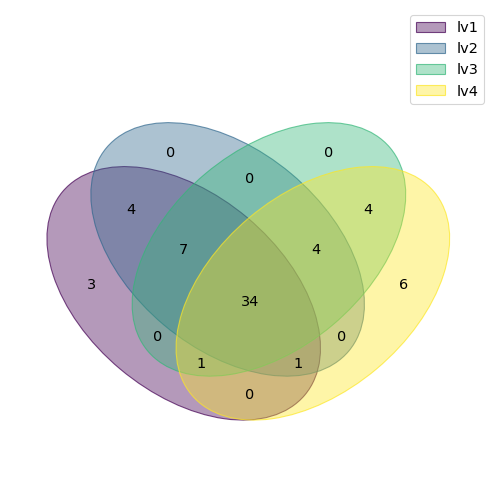

In [289]:
dat_dict = {"lv1": set(Bias_sib_lv1_wt.head(50)["STR"].values), 
            "lv2":set(Bias_sib_lv2_wt.head(50)["STR"].values),
            "lv3":set(Bias_sib_lv3_wt.head(50)["STR"].values),
            "lv4":set(Bias_sib_lv4_wt.head(50)["STR"].values)}
plt.figure(dpi=120)
venn(dat_dict)

### Bias vs Score

In [290]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
Carteisn_Dist_Mat_All = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv", index_col=0)
InfoMat = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.Entropy.csv", index_col=0)
ProbMat1 = np.exp2(-InfoMat)
ProbMat1[ProbMat1==1] = 0
ProbMat2 = 1-ProbMat1
topNs = list(range(200, 10, -5))

In [291]:
def PlotXXX(CaseDF, Cont1DF, Cont2DF, topNs=topNs, adj_mat=adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2):
    STR_Ranks1 = CaseDF["STR"].values
    STR_Ranks2 = Cont1DF["STR"].values
    STR_Ranks3 = Cont2DF["STR"].values
    asd_topN_cohe_1 = []
    asd_topN_cohe_2 = []
    asd_topN_cohe_3 = []
    for topN in topNs:
        top_strs1 = STR_Ranks1[:topN]
        top_strs2 = STR_Ranks2[:topN]
        top_strs3 = STR_Ranks3[:topN]
        asd_score1 = ScoreCircuit_v7(top_strs1, adj_mat, ProbMat1, ProbMat2)
        asd_score2 = ScoreCircuit_v7(top_strs2, adj_mat, ProbMat1, ProbMat2)
        asd_score3 = ScoreCircuit_v7(top_strs3, adj_mat, ProbMat1, ProbMat2)
        asd_topN_cohe_1.append(asd_score1)
        asd_topN_cohe_2.append(asd_score2)
        asd_topN_cohe_3.append(asd_score3)
    asd_topN_cohe_1 = np.array(asd_topN_cohe_1)
    asd_topN_cohe_2 = np.array(asd_topN_cohe_2)
    asd_topN_cohe_3 = np.array(asd_topN_cohe_3)
    return asd_topN_cohe_1, asd_topN_cohe_2, asd_topN_cohe_3

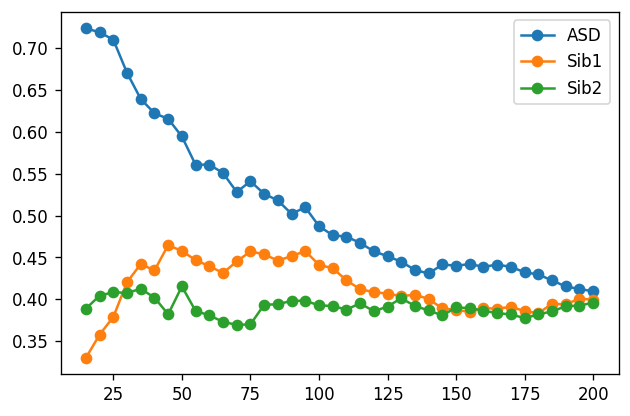

In [292]:
x1, x2, x3 = PlotXXX(Bias_Spark_1stage_lv1, Bias_sib_lv1, Bias_sib_lv1_wt)
plt.figure(dpi=120)
plt.plot(topNs, x1, label="ASD", marker="o")
plt.plot(topNs, x2, label="Sib1", marker="o")
plt.plot(topNs, x3, label="Sib2", marker="o")
plt.legend()

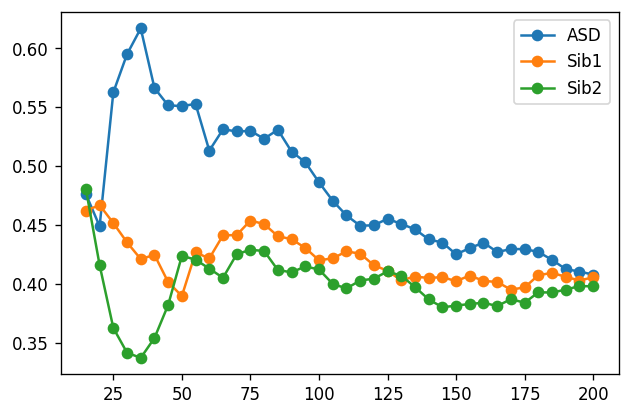

In [293]:
x1, x2, x3 = PlotXXX(Bias_Spark_1stage_lv2, Bias_sib_lv2, Bias_sib_lv2_wt)
plt.figure(dpi=120)
plt.plot(topNs, x1, label="ASD", marker="o")
plt.plot(topNs, x2, label="Sib1", marker="o")
plt.plot(topNs, x3, label="Sib2", marker="o")
plt.legend()

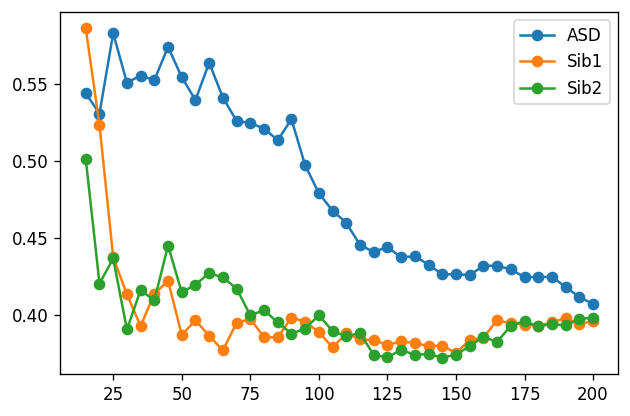

In [294]:
x1, x2, x3 = PlotXXX(Bias_Spark_1stage_lv3, Bias_sib_lv3, Bias_sib_lv3_wt)
plt.figure(dpi=120)
plt.plot(topNs, x1, label="ASD", marker="o")
plt.plot(topNs, x2, label="Sib1", marker="o")
plt.plot(topNs, x3, label="Sib2", marker="o")
plt.legend()

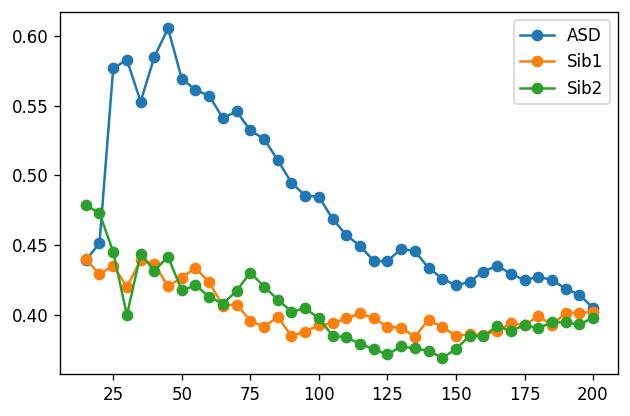

In [295]:
x1, x2, x3 = PlotXXX(Bias_Spark_1stage_lv4, Bias_sib_lv4, Bias_sib_lv4_wt)
plt.figure(dpi=120)
plt.plot(topNs, x1, label="ASD", marker="o")
plt.plot(topNs, x2, label="Sib1", marker="o")
plt.plot(topNs, x3, label="Sib2", marker="o")
plt.legend()

### Test Distance

In [296]:
# select best fit sibling
from scipy import stats

def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

Cartesian_distancesDF = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
adj_mat = pd.read_csv(ConnFil, index_col=0)
Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distancesDF, cutoff=0)

0.28399849506555147 1.0965781616079084e-09


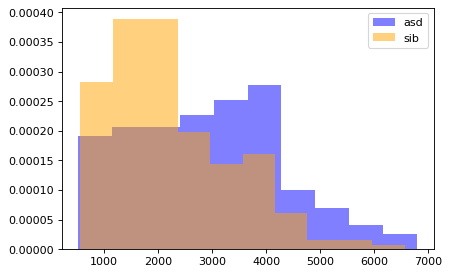

In [297]:
ASD_BiasDF = Bias_Spark_1stage_lv1
Sib_BiasDF = Bias_sib_lv1

top46_strs = ASD_BiasDF.head(46)["STR"].values
asd_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_strs = Sib_BiasDF.head(46)["STR"].values
sib_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.hist(asd_dists, density=1, alpha=0.5, color="blue", label="asd")
plt.hist(sib_dists, density=1, alpha=0.5, color="orange", label="sib")
plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
print(t,p)

0.38127963990032954 1.5210055437364645e-14


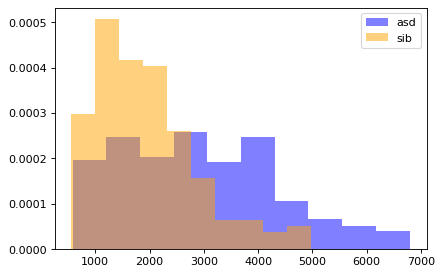

In [299]:
ASD_BiasDF = Bias_Spark_1stage_lv2
Sib_BiasDF = Bias_sib_lv2

top46_strs = ASD_BiasDF.head(46)["STR"].values
asd_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_strs = Sib_BiasDF.head(46)["STR"].values
sib_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.hist(asd_dists, density=1, alpha=0.5, color="blue", label="asd")
plt.hist(sib_dists, density=1, alpha=0.5, color="orange", label="sib")
plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
print(t,p)

0.25003074400491904 2.3084137785733816e-06


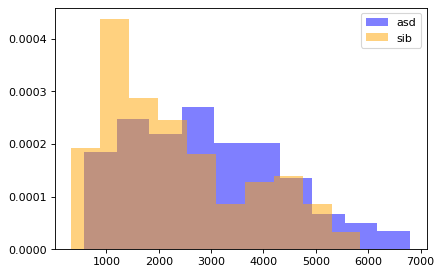

In [300]:
ASD_BiasDF = Bias_Spark_1stage_lv3
Sib_BiasDF = Bias_sib_lv3

top46_strs = ASD_BiasDF.head(46)["STR"].values
asd_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_strs = Sib_BiasDF.head(46)["STR"].values
sib_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.hist(asd_dists, density=1, alpha=0.5, color="blue", label="asd")
plt.hist(sib_dists, density=1, alpha=0.5, color="orange", label="sib")
plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
print(t,p)

0.28064388441746935 2.3692962003440954e-07


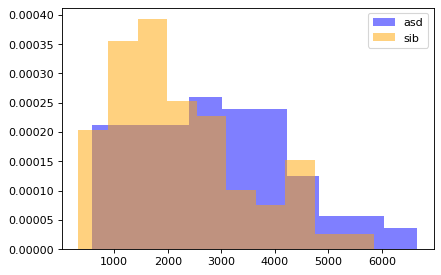

In [301]:
ASD_BiasDF = Bias_Spark_1stage_lv4
Sib_BiasDF = Bias_sib_lv4

top46_strs = ASD_BiasDF.head(46)["STR"].values
asd_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_strs = Sib_BiasDF.head(46)["STR"].values
sib_dists = Cartesian_distances_w_edge.loc[top46_strs, top46_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.hist(asd_dists, density=1, alpha=0.5, color="blue", label="asd")
plt.hist(sib_dists, density=1, alpha=0.5, color="orange", label="sib")
plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
print(t,p)

## Bias of Rand Genes at diff size

#### 46

In [200]:
topN=10

In [201]:
RandG_DIR_46_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.46.W1/"
RandG_DIR_46_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.46.W2/"
Weights_46_1 = []
Weights_46_2 = []
for i in range(1, 10):
    for j in range(1, 100, 1):
        biasdf1 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_46_1,i,j), index_col="STR")
        biasdf2 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_46_2,i,j), index_col="STR")
        Weights_46_1.append(biasdf1.head(topN)["EFFECT"].mean())
        Weights_46_2.append(biasdf2.head(topN)["EFFECT"].mean())
x1 = Bias_Spark_1stage_lv1.head(topN)["EFFECT"].mean()
x2 = Bias_sib_lv1.head(topN)["EFFECT"].mean()
x3 = Bias_sib_lv1_wt.head(topN)["EFFECT"].mean()

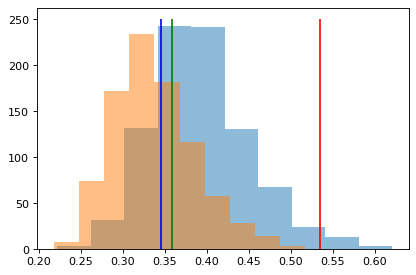

In [202]:
fig, ax = plt.subplots()
ax.hist(Weights_46_1, alpha=0.5, label="W1")
ax.hist(Weights_46_2, alpha=0.5, label="W2")
ax.vlines(x=x1, ymin=0, ymax=250, label="ASD", color="red")
ax.vlines(x=x2, ymin=0, ymax=250, label="Sib1", color="blue")
ax.vlines(x=x3, ymin=0, ymax=250, label="Sib2", color="green")

In [205]:
RandG_DIR_160_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.160.W1/"
RandG_DIR_160_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.160.W2/"
Weights_160_1 = []
Weights_160_2 = []
for i in range(1, 10):
    for j in range(1, 100, 1):
        biasdf1 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_160_1,i,j), index_col="STR")
        biasdf2 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_160_2,i,j), index_col="STR")
        Weights_160_1.append(biasdf1.head(topN)["EFFECT"].mean())
        Weights_160_2.append(biasdf2.head(topN)["EFFECT"].mean())
x1 = Bias_Spark_1stage_lv2.head(topN)["EFFECT"].mean()
x2 = Bias_sib_lv2.head(topN)["EFFECT"].mean()
x3 = Bias_sib_lv2_wt.head(topN)["EFFECT"].mean()

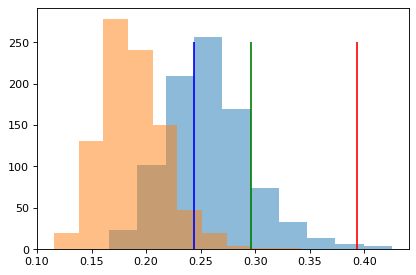

In [206]:
fig, ax = plt.subplots()
ax.hist(Weights_160_1, alpha=0.5, label="W1")
ax.hist(Weights_160_2, alpha=0.5, label="W2")
ax.vlines(x=x1, ymin=0, ymax=250, label="ASD", color="red")
ax.vlines(x=x2, ymin=0, ymax=250, label="Sib1", color="blue")
ax.vlines(x=x3, ymin=0, ymax=250, label="Sib2", color="green")

In [211]:
RandG_DIR_676_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.676.W1/"
RandG_DIR_676_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.676.W2/"
Weights_676_1 = []
Weights_676_2 = []
for i in range(1, 10):
    for j in range(1, 100, 1):
        biasdf1 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_676_1,i,j), index_col="STR")
        biasdf2 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_676_2,i,j), index_col="STR")
        Weights_676_1.append(biasdf1.head(topN)["EFFECT"].mean())
        Weights_676_2.append(biasdf2.head(topN)["EFFECT"].mean())
x1 = Bias_Spark_1stage_lv3.head(topN)["EFFECT"].mean()
x2 = Bias_sib_lv3.head(topN)["EFFECT"].mean()
x3 = Bias_sib_lv3_wt.head(topN)["EFFECT"].mean()

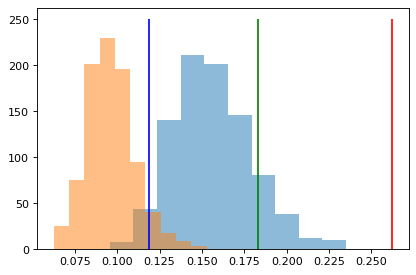

In [212]:
fig, ax = plt.subplots()
ax.hist(Weights_676_1, alpha=0.5, label="W1")
ax.hist(Weights_676_2, alpha=0.5, label="W2")
ax.vlines(x=x1, ymin=0, ymax=250, label="ASD", color="red")
ax.vlines(x=x2, ymin=0, ymax=250, label="Sib1", color="blue")
ax.vlines(x=x3, ymin=0, ymax=250, label="Sib2", color="green")

In [213]:
RandG_DIR_1292_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.1292.W1/"
RandG_DIR_1292_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.1292.W2/"
Weights_1292_1 = []
Weights_1292_2 = []
for i in range(1, 10):
    for j in range(1, 100, 1):
        biasdf1 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_1292_1,i,j), index_col="STR")
        biasdf2 = pd.read_csv("{}/cont.bias.{}.{}.csv".format(RandG_DIR_1292_2,i,j), index_col="STR")
        Weights_1292_1.append(biasdf1.head(topN)["EFFECT"].mean())
        Weights_1292_2.append(biasdf2.head(topN)["EFFECT"].mean())
x1 = Bias_Spark_1stage_lv4.head(topN)["EFFECT"].mean()
x2 = Bias_sib_lv4.head(topN)["EFFECT"].mean()
x3 = Bias_sib_lv4_wt.head(topN)["EFFECT"].mean()

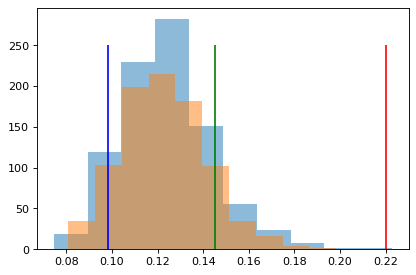

In [214]:
fig, ax = plt.subplots()
ax.hist(Weights_1292_1, alpha=0.5, label="W1")
ax.hist(Weights_1292_2, alpha=0.5, label="W2")
ax.vlines(x=x1, ymin=0, ymax=250, label="ASD", color="red")
ax.vlines(x=x2, ymin=0, ymax=250, label="Sib1", color="blue")
ax.vlines(x=x3, ymin=0, ymax=250, label="Sib2", color="green")

#### CircuitScoreAt50

In [216]:
InfoMat_long = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.long.csv", index_col=0)
ProbMat1_long = np.exp2(-InfoMat_long)
ProbMat1_long[ProbMat1_long==1] = 0
ProbMat2_long = 1-ProbMat1_long

InfoMat_short = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw/ScoreMat_Distance.short.csv", index_col=0)
ProbMat1_short = np.exp2(-InfoMat_short)
ProbMat1_short[ProbMat1_short==1] = 0
ProbMat2_short = 1-ProbMat1_short

In [225]:
def ScoreDist(contDir, adj_mat=adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, 
              ProbMat1_short=ProbMat1_short, ProbMat2_short=ProbMat2_short,
              ProbMat1_long=ProbMat1_long, ProbMat2_long=ProbMat2_long,
              Ncont=1000, topN=46):

    topN_bias = []
    cont_topN_Scores = []
    cont_topN_Scores_short = []
    cont_topN_Scores_long = []

    cc = 0
    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        bias = df.loc[top_strs, "EFFECT"].mean()       

        topN_bias.append(bias)
        cont_score = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
        cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
        cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
        cont_topN_Scores.append(cont_score)
        cont_topN_Scores_short.append(cont_score_short)
        cont_topN_Scores_long.append(cont_score_long)
        cc += 1
        if cc>Ncont:
            break

    return cont_topN_Scores, cont_topN_Scores_short, cont_topN_Scores_long

In [226]:
topN = 46

In [227]:
ASD_BiasDF = Bias_Spark_1stage_lv1
top_strs = ASD_BiasDF.head(topN)["STR"].values
asd_score_1 = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
asd_score_1_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
asd_score_1_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)

ASD_BiasDF = Bias_Spark_1stage_lv2
top_strs = ASD_BiasDF.head(topN)["STR"].values
asd_score_2 = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
asd_score_2_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
asd_score_2_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)

ASD_BiasDF = Bias_Spark_1stage_lv3
top_strs = ASD_BiasDF.head(topN)["STR"].values
asd_score_3 = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
asd_score_3_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
asd_score_3_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)

ASD_BiasDF = Bias_Spark_1stage_lv4
top_strs = ASD_BiasDF.head(topN)["STR"].values
asd_score_4 = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1, ProbMat2)
asd_score_4_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
asd_score_4_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)

In [228]:
RandG_DIR_1292_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.1292.W1/"
RandG_DIR_1292_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.1292.W2/"
RandG_DIR_1292_dat1, RandG_DIR_1292_dat1_short, RandG_DIR_1292_dat1_long = ScoreDist(
    RandG_DIR_1292_1, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)
RandG_DIR_1292_dat2, RandG_DIR_1292_dat2_short, RandG_DIR_1292_dat2_long = ScoreDist(
    RandG_DIR_1292_2, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:>

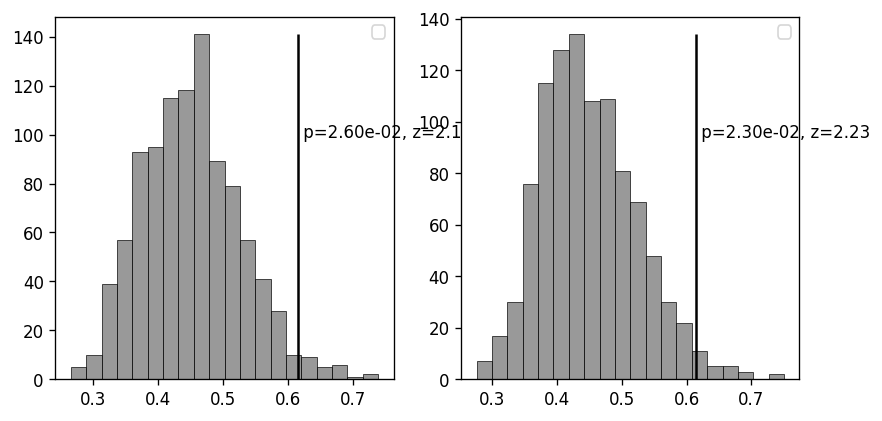

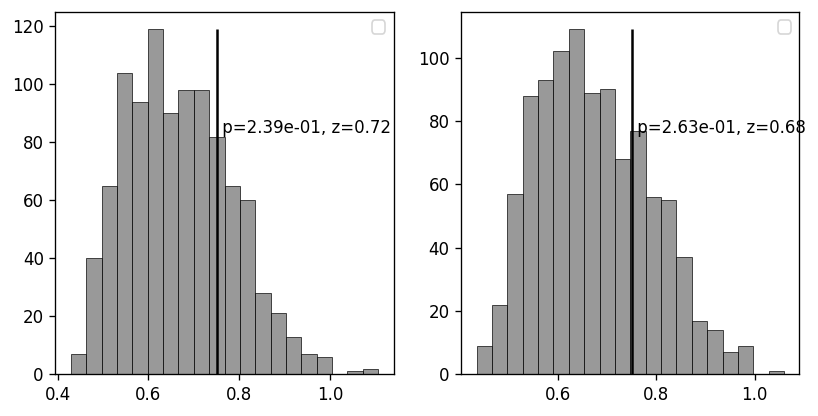

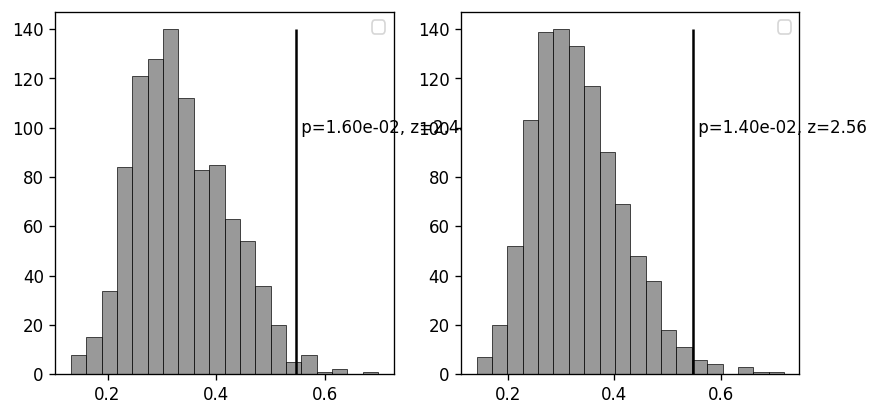

In [229]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_1292_dat1, asd_score_4, ax1,)
PlotPermutationP(RandG_DIR_1292_dat2, asd_score_4, ax2,)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_1292_dat1_short, asd_score_4_short, ax1,)
PlotPermutationP(RandG_DIR_1292_dat2_short, asd_score_4_short, ax2,)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_1292_dat1_long, asd_score_4_long, ax1,)
PlotPermutationP(RandG_DIR_1292_dat2_long, asd_score_4_long, ax2,)

In [177]:
RandG_DIR_676_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.676.W1/"
RandG_DIR_676_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.676.W2/"
RandG_DIR_676_dat1, RandG_DIR_676_dat1_short, RandG_DIR_676_dat1_long = ScoreDist(
    RandG_DIR_676_1, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)
RandG_DIR_676_dat2, RandG_DIR_676_dat2_short, RandG_DIR_676_dat2_long = ScoreDist(
    RandG_DIR_676_2, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:>

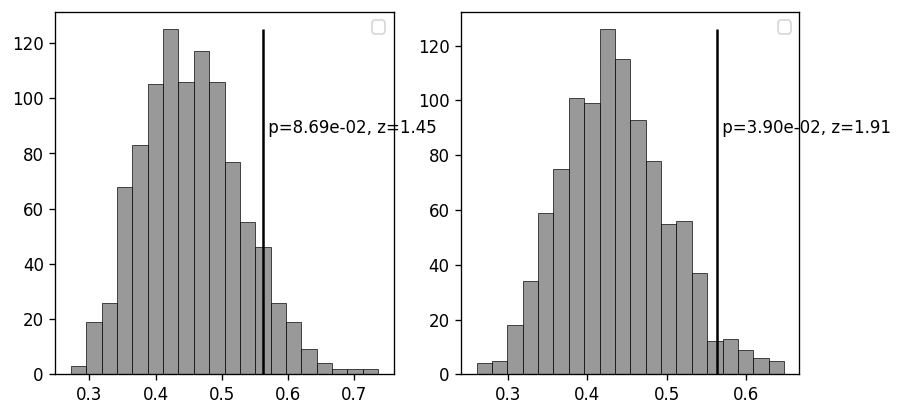

In [178]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_676_dat1, asd_score_3, ax1,)
PlotPermutationP(RandG_DIR_676_dat2, asd_score_3, ax2,)

In [179]:
RandG_DIR_160_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.160.W1/"
RandG_DIR_160_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.160.W2/"
RandG_DIR_160_dat1 = ScoreDist(RandG_DIR_160_1, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)
RandG_DIR_160_dat2 = ScoreDist(RandG_DIR_160_2, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:>

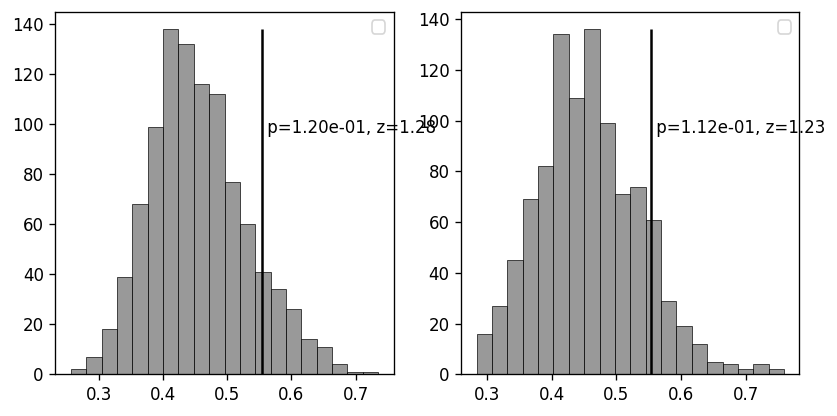

In [180]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_160_dat1, asd_score_2, ax1,)
PlotPermutationP(RandG_DIR_160_dat2, asd_score_2, ax2,)

In [181]:
RandG_DIR_46_1 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.46.W1/"
RandG_DIR_46_2 = "/home/jw3514/Work/ASD_Circuits/dat/Unionize_bias/RandGene.46.W2/"
RandG_DIR_46_dat1 = ScoreDist(RandG_DIR_46_1, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)
RandG_DIR_46_dat2 = ScoreDist(RandG_DIR_46_2, adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2, Ncont=1000, topN=topN)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:>

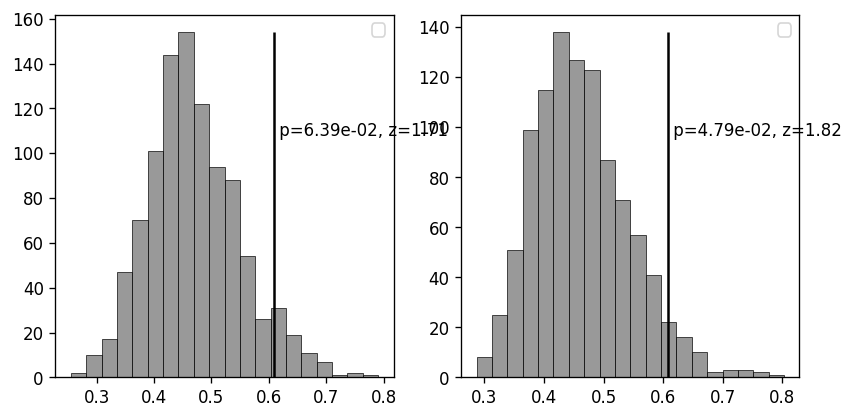

In [182]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=120)
PlotPermutationP(RandG_DIR_46_dat1, asd_score_1, ax1,)
PlotPermutationP(RandG_DIR_46_dat2, asd_score_1, ax2,)

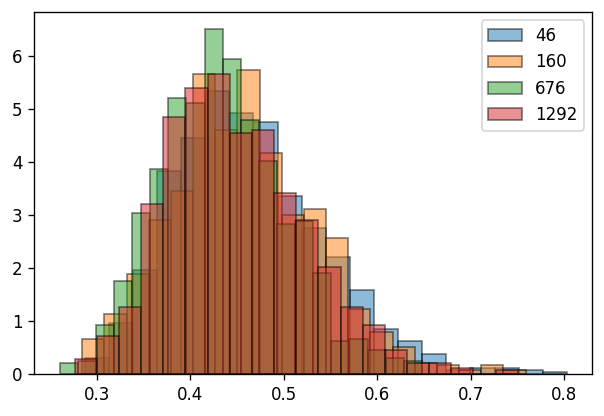

In [188]:
plt.figure(dpi=120)
plt.hist(RandG_DIR_46_dat2, bins=20, density=1, alpha=0.5, label="46", edgecolor="black")
plt.hist(RandG_DIR_160_dat2,  bins=20, density=1, alpha=0.5, label="160", edgecolor="black")
plt.hist(RandG_DIR_676_dat2,  bins=20, density=1, alpha=0.5, label="676", edgecolor="black")
plt.hist(RandG_DIR_1292_dat2,  bins=20, density=1, alpha=0.5, label="1292", edgecolor="black")
plt.legend()

In [191]:
print(np.mean(RandG_DIR_46_dat2), np.mean(RandG_DIR_160_dat2))
stats.mannwhitneyu(RandG_DIR_46_dat2, RandG_DIR_160_dat2)

0.4631810923535572 0.45808357608444333


MannwhitneyuResult(statistic=513189.0, pvalue=0.3261663021059118)

In [192]:
print(np.mean(RandG_DIR_46_dat2), np.mean(RandG_DIR_676_dat2))
stats.mannwhitneyu(RandG_DIR_46_dat2, RandG_DIR_676_dat2)

0.4631810923535572 0.43552354944214


MannwhitneyuResult(statistic=595792.0, pvalue=1.657398707017443e-13)

In [193]:
print(np.mean(RandG_DIR_46_dat2), np.mean(RandG_DIR_1292_dat2))
stats.mannwhitneyu(RandG_DIR_46_dat2, RandG_DIR_1292_dat2)

0.4631810923535572 0.44995170469171286


MannwhitneyuResult(statistic=546069.0, pvalue=0.0004215770154923288)

In [396]:
mutP = pd.read_csv("/home/jw3514/Work/ASD_Circuits/dat/Other/Jan20_Gene_n_Prob.csv", index_col="Genes")

In [409]:
5903 in mutP.index.values

False

In [407]:
mutP

,Prob
Genes,
64109,0.000018
1438,0.000030
207063,0.000024
6192,0.000011
5613,0.000023
...,...
1375,0.000209
23542,0.000045
410,0.000146


In [412]:
for i, row in SiblingDF.iterrows():
    g = int(row["g"])
    if g in mutP.index.values:
        mut = mutP.loc[g, "Prob"]
        SiblingDF.loc[i, "p"] = mut
    else:
        SiblingDF.loc[i, "p"] = 0

In [415]:
SiblingDF = SiblingDF.sort_values(by=['w', 'p'], ascending=[False, True])
SiblingDF.to_csv("Sibling.mutweight.csv")

In [417]:
SiblingDF.head(50)

,g,w,p
0,10765,2.337,0.000262
1,7273,1.674,0.002754
2,6263,1.386,0.001173
3,23345,1.125,0.000644
4,23216,0.981,0.000101
6,4763,0.981,0.000304
5,4641,0.981,0.000318
7,10594,0.924,0.000729
9,29929,0.837,0.000089
11,7450,0.837,0.000214


### ASD 61 vs Sib 61

In [422]:
tmpdf = SiblingDF.head(61)
GW_sib_61 = dict(zip(tmpdf["g"].values, tmpdf["w"].values))

Bias_sib_61 = AvgSTRZ_Weighted(ExpZ2, GW_sib_61, Method = 1,
                                        csv_fil = "../dat/Unionize_bias/sib.top61.Z2.csv")
ASD_Bias = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.csv", index_col="STR")
Cont_DIR = "../dat/Unionize_bias/RandGene.61.W1/"

In [423]:
ASD_Z2_Bias, ASD_Z2_Match_Bias_Rank, ASD_Z2_Sim_Bias_STR = LoadBiasData2(
    ASD_Bias, Cont_DIR)

In [424]:
def LoadBiasData2(Real_Bias, Sim_dir):
    #ASD_Bias = pd.read_csv(ASD_Bias, index_col="STR")
    ASD_STR_Biases = {}
    for STR, row in Real_Bias.iterrows():
        ASD_STR_Biases[STR] = STRBias(STR, row["EFFECT"], row["Rank"])     
            
    biases_match_rank = {}
    biases_match_STR = {}
    for file in os.listdir(Sim_dir):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(Sim_dir+file, index_col="STR")
        for STR, row in df.iterrows():
            if STR not in biases_match_STR:
                biases_match_STR[STR] = []
            biases_match_STR[STR].append(row["EFFECT"])
            if row["Rank"] not in biases_match_rank:
                biases_match_rank[row["Rank"]] = []
            biases_match_rank[row["Rank"]].append(row["EFFECT"])
    return ASD_STR_Biases, biases_match_rank, biases_match_STR
def CI(simulations, p):
    simulations = sorted(simulations, reverse=False)
    n = len(simulations)
    u_pval = (1+p)/2.
    l_pval = (1-u_pval)
    l_indx = int(np.floor(n*l_pval))
    u_indx = int(np.floor(n*u_pval))
    return(simulations[l_indx],simulations[u_indx])
class STRBias:
    def __init__(self, STR, Bias, Rank):
        self.STR = STR
        self.Bias = Bias
        self.Rank = Rank
        self.Boots = []
    def GetCI(self, p):
        return CI(self.Boots, p)

(array([ 8., 10., 34., 55., 45., 32., 16.,  8.,  2.,  3.]),
 array([-0.35963565, -0.27126082, -0.18288599, -0.09451116, -0.00613633,
         0.0822385 ,  0.17061333,  0.25898816,  0.34736299,  0.43573782,
         0.52411265]),
 <BarContainer object of 10 artists>)

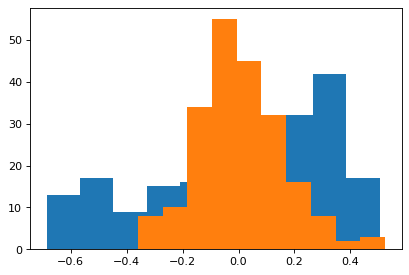

In [425]:
ASD_Bias_values = ASD_Bias["EFFECT"].values
Sib_Bias_values = Bias_sib_61["EFFECT"].values
plt.hist(ASD_Bias_values)
plt.hist(Sib_Bias_values)

#### add FDR

In [375]:
mannwhitneyu(np.abs(ASD_Bias_values), np.abs(Sib_Bias_values))

MannwhitneyuResult(statistic=34858.0, pvalue=9.644166420878252e-22)

In [420]:
# ASD Bias Qvalue
import statsmodels.stats as stats

def getBiasesBySTR(STR, dfs):
    biases = []
    for df in dfs:
        bias = df.loc[STR, "EFFECT"]
        biases.append(bias)
    biases = np.array(biases)
    return biases

ASD_Sim_dir = "../dat/Unionize_bias/RandGene.61.W1/"
ASD_Sim_dir = "../dat/Unionize_bias/ASD_Sim/"
cont_dfs = []
for file in os.listdir(ASD_Sim_dir):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(ASD_Sim_dir+file, index_col="STR")
    cont_dfs.append(df)

for STR, row in ASD_Bias.iterrows():
    mat_bias = getBiasesBySTR(STR, cont_dfs)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    ASD_Bias.loc[STR, "Pvalue"] = P
    ASD_Bias.loc[STR, "Z_Match"] = Z
    
acc, qvalues = stats.multitest.fdrcorrection(ASD_Bias["Pvalue"].values, alpha=0.05,
                                                   method="i")
print(sum(acc))
ASD_Bias["qvalues"] = qvalues
ASD_Bias.to_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.v2.csv")

43


In [421]:
ASD_Bias.head(50)

,EFFECT,REGION,Rank,Pvalue,Z_Match,qvalues
STR,,,,,,
Nucleus_accumbens,0.504843,Striatum,1,0.000400,3.785510,0.025557
Orbital_area_lateral_part,0.502925,Isocortex,2,0.000100,3.877800,0.021298
Prelimbic_area,0.497309,Isocortex,3,0.000600,3.683304,0.025557
Primary_somatosensory_area_lower_limb,0.467266,Isocortex,4,0.000200,3.681423,0.021298
Orbital_area_ventrolateral_part,0.464161,Isocortex,5,0.000800,3.419775,0.027106
Parafascicular_nucleus,0.459904,Thalamus,6,0.000900,3.367991,0.027106
Lateral_amygdalar_nucleus,0.450113,Amygdalar,7,0.001100,3.431815,0.027106
Claustrum,0.446213,Cortical_subplate,8,0.001200,3.385281,0.027106
Endopiriform_nucleus_dorsal_part,0.435461,Cortical_subplate,9,0.000600,3.387793,0.025557


In [390]:
#Bias_sib_61 = Bias_sib_61.set_index("STR")
for STR, row in Bias_sib_61.iterrows():
    mat_bias = getBiasesBySTR(STR, cont_dfs)
    Z, P = GetPermutationP(mat_bias, row["EFFECT"])
    Bias_sib_61.loc[STR, "Pvalue"] = P
    Bias_sib_61.loc[STR, "Z_Match"] = Z
    
acc, qvalues = stats.multitest.fdrcorrection(Bias_sib_61["Pvalue"].values, alpha=0.1,
                                                   method="i")
print(sum(acc))
Bias_sib_61["qvalues"] = qvalues
Bias_sib_61.to_csv("../dat/Unionize_bias/sib.61.Z2.bias.FDR.v2.csv")

0


In [392]:
Bias_sib_61.head(50)

,EFFECT,REGION,Rank,Pvalue,Z_Match,qvalues
STR,,,,,,
Dentate_gyrus,0.524648,Hippocampus,1,0.001100,3.383019,0.234277
Bed_nuclei_of_the_stria_terminalis,0.388628,Pallidum,2,0.004400,2.796338,0.367388
Anterior_pretectal_nucleus,0.376148,Midbrain,3,0.011299,2.442644,0.481332
Field_CA3,0.374140,Hippocampus,4,0.006899,2.650454,0.367388
Field_CA2,0.356645,Hippocampus,5,0.006799,2.617373,0.367388
Lateral_septal_nucleus_caudal_caudodorsal_part,0.328547,Striatum,6,0.018398,2.222723,0.636806
Posterior_limiting_nucleus_of_the_thalamus,0.292167,Thalamus,7,0.029897,1.936888,0.636806
Inferior_colliculus_central_nucleus,0.284576,Midbrain,8,0.028697,1.929948,0.636806
Claustrum,0.275708,Cortical_subplate,9,0.023398,2.071485,0.636806


### Figure

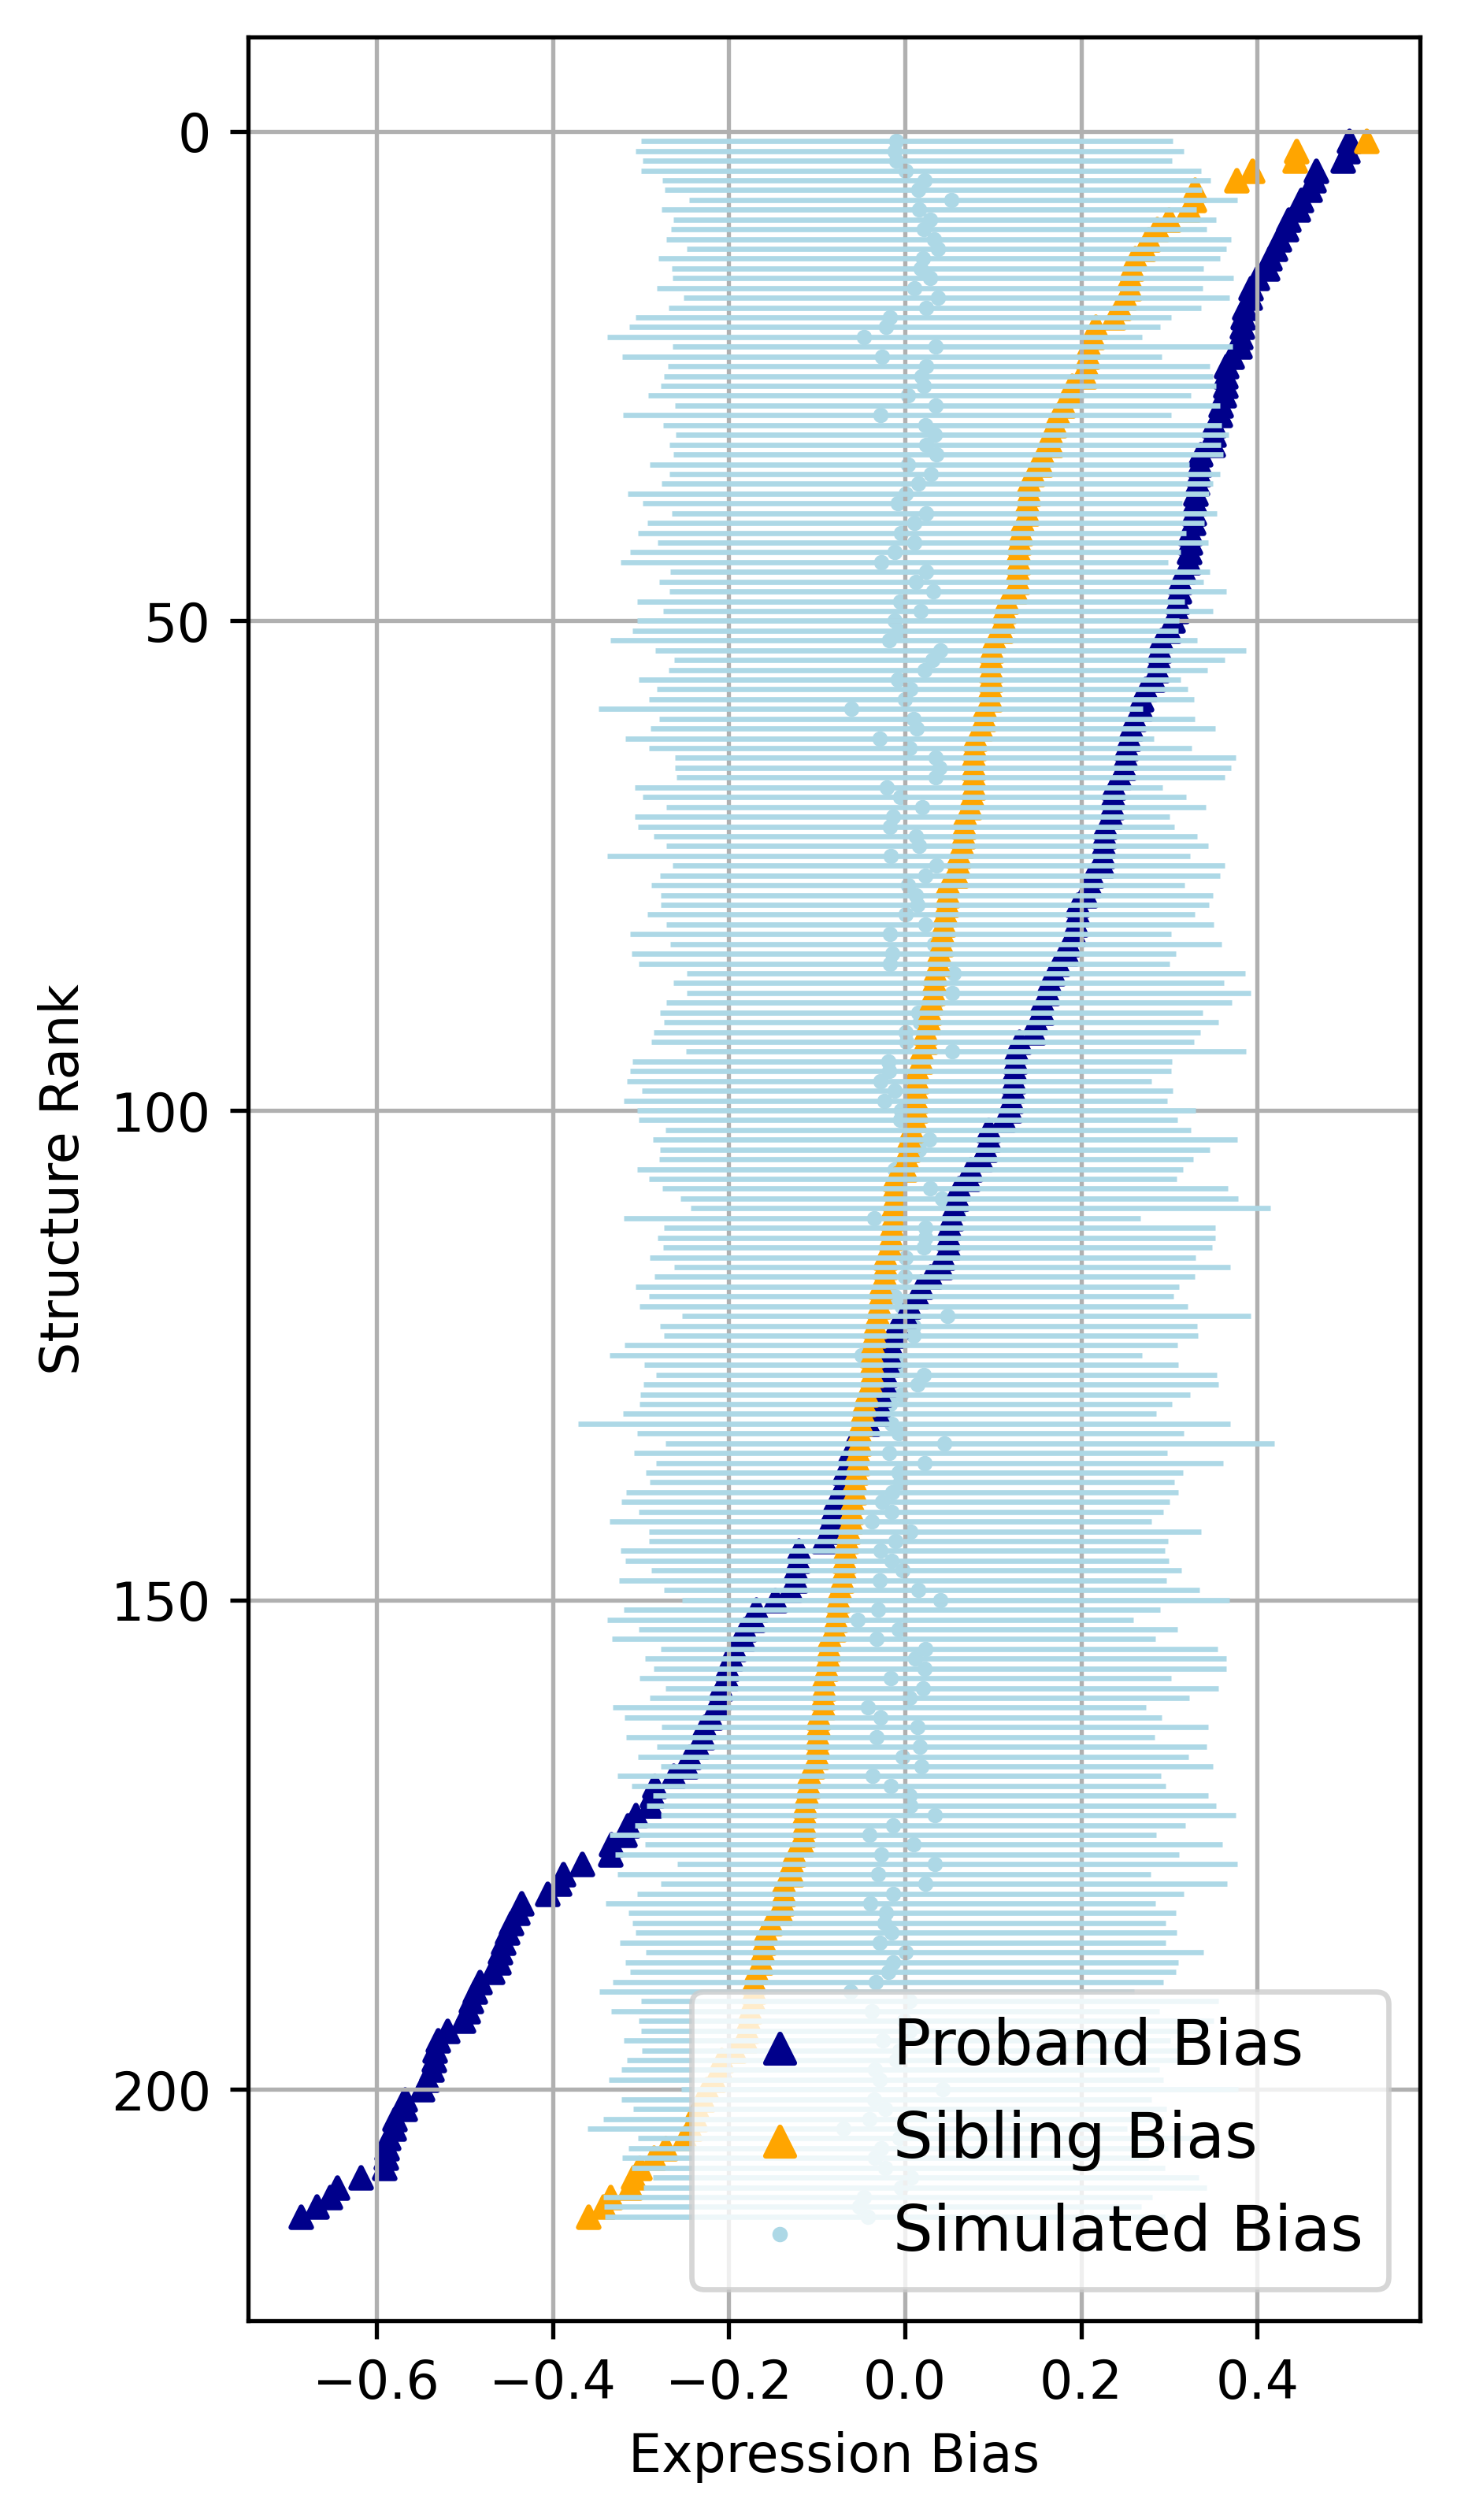

In [433]:
fig, ax = plt.subplots(figsize=(4, 8), dpi=480)

for i, (Rank, data) in enumerate(ASD_Z2_Sim_Bias_STR.items()):
    upper, lower = CI(data, 0.95)
    ax.hlines(i+1 , lower, upper, color = "lightblue", lw=1)
    x4 = ax.scatter(np.mean(data), i+1, marker=".", s=15, color="lightblue")
    
for i, (STR, Row) in enumerate(ASD_Bias.iterrows()):
    x1 = ax.scatter(Row["EFFECT"], i+1, marker="^", s=15, color="darkblue")
for i, (STR, Row) in enumerate(Bias_sib_61.iterrows()):
    x2 = ax.scatter(Row["EFFECT"], i+1, marker="^", s=15, color="orange")



plt.gca().invert_yaxis()
lgnd = ax.legend([x1, x2, x4], 
                 ["Proband Bias", "Sibling Bias", 'Simulated Bias'], 
                 prop={'size': 12}, loc="lower right")

lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[3]._sizes = [30]

#plt.ylim(50, 0)
#plt.xlim(-0.4, 0.8)

plt.xlabel("Expression Bias")
plt.ylabel("Structure Rank")
plt.grid(True)
plt.savefig("../figs/new_Figure2A.pdf")

AttributeError: module 'statsmodels.stats' has no attribute 'ks_2samp'

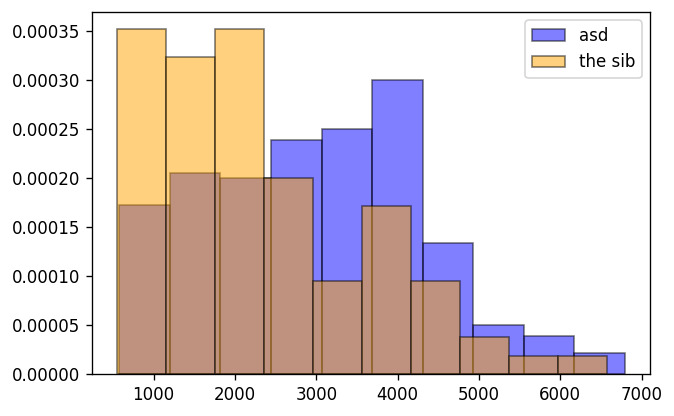

In [426]:
topN = 46
top46_asd_strs = ASD_Bias.head(topN).index.values
asd_dists = Cartesian_distances_w_edge.loc[top46_asd_strs, top46_asd_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_sib_strs = Bias_sib_61.head(topN)["STR"].values
sib_dists = Cartesian_distances_w_edge.loc[top46_sib_strs, top46_sib_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.figure(dpi=120)
plt.hist(asd_dists, density=1, alpha=0.5, label="asd", edgecolor="black", bins=10, color="blue")
plt.hist(sib_dists, density=1, alpha=0.5, label="the sib", edgecolor="black", bins=10, color="orange")

plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
plt.text(5000, 0.00025, s="P=%.2e"%p)
plt.xlabel(r"Connection Distance ($\mu$m)")
print(t, p)

AttributeError: module 'statsmodels.stats' has no attribute 'ks_2samp'

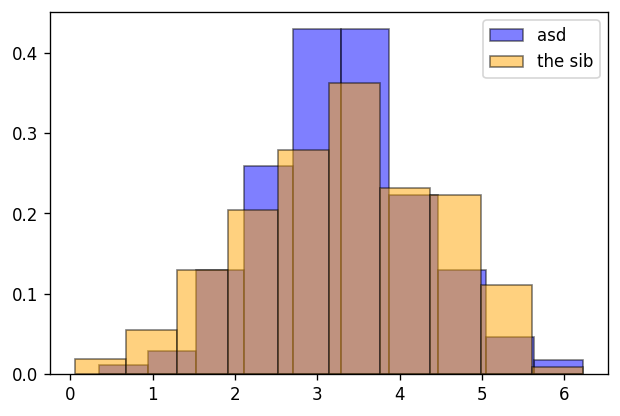

In [427]:
topN = 46
top46_asd_strs = ASD_Bias.head(topN).index.values
asd_dists = adj_mat.loc[top46_asd_strs, top46_asd_strs].values.flatten()
asd_dists = np.array([x for x in asd_dists if x >0])

top46_sib_strs = Bias_sib_61.head(topN)["STR"].values
sib_dists = adj_mat.loc[top46_sib_strs, top46_sib_strs].values.flatten()
sib_dists = np.array([x for x in sib_dists if x >0])

plt.figure(dpi=120)
plt.hist(asd_dists, density=1, alpha=0.5, label="asd", edgecolor="black", bins=10, color="blue")
plt.hist(sib_dists, density=1, alpha=0.5, label="the sib", edgecolor="black", bins=10, color="orange")

plt.legend()
t, p = stats.ks_2samp(asd_dists, sib_dists)
#plt.text(5000, 0.00025, s="P=%.2e"%p)
plt.text(4, 0.3, s="P=%.2e"%p)
plt.xlabel(r"Connection Weights")
print(t, p)

In [428]:
def PlotXXX(CaseDF, Cont1DF, topNs=topNs, adj_mat=adj_mat, ProbMat1=ProbMat1, ProbMat2=ProbMat2):
    STR_Ranks1 = CaseDF.index.values
    STR_Ranks2 = Cont1DF["STR"].values
    asd_topN_cohe_1 = []
    asd_topN_cohe_2 = []
    for topN in topNs:
        top_strs1 = STR_Ranks1[:topN]
        top_strs2 = STR_Ranks2[:topN]
        asd_score1 = ScoreCircuit_v7(top_strs1, adj_mat, ProbMat1, ProbMat2)
        asd_score2 = ScoreCircuit_v7(top_strs2, adj_mat, ProbMat1, ProbMat2)
        asd_score3 = ScoreCircuit_v7(top_strs3, adj_mat, ProbMat1, ProbMat2)
        asd_topN_cohe_1.append(asd_score1)
        asd_topN_cohe_2.append(asd_score2)
    asd_topN_cohe_1 = np.array(asd_topN_cohe_1)
    asd_topN_cohe_2 = np.array(asd_topN_cohe_2)
    return asd_topN_cohe_1, asd_topN_cohe_2

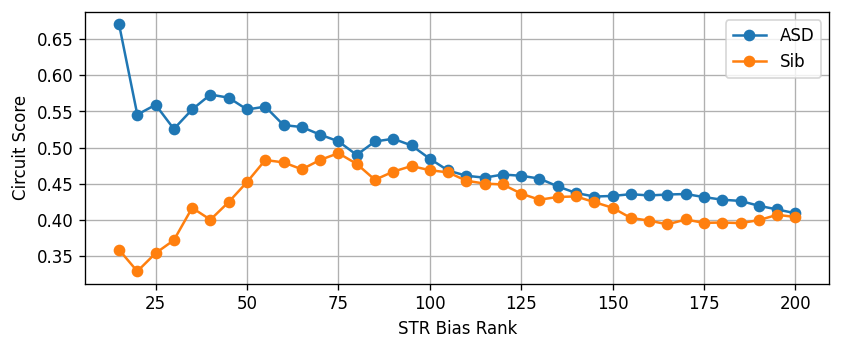

In [429]:
topNs = np.arange(200,10,-5)
x1, x2 = PlotXXX(ASD_Bias, Bias_sib_61, topNs)
plt.figure(dpi=120, figsize=(8, 3))
plt.plot(topNs, x1, label="ASD", marker="o")
plt.plot(topNs, x2, label="Sib", marker="o")
plt.xlabel("STR Bias Rank")
plt.ylabel("Circuit Score")
plt.grid(True)
plt.legend()

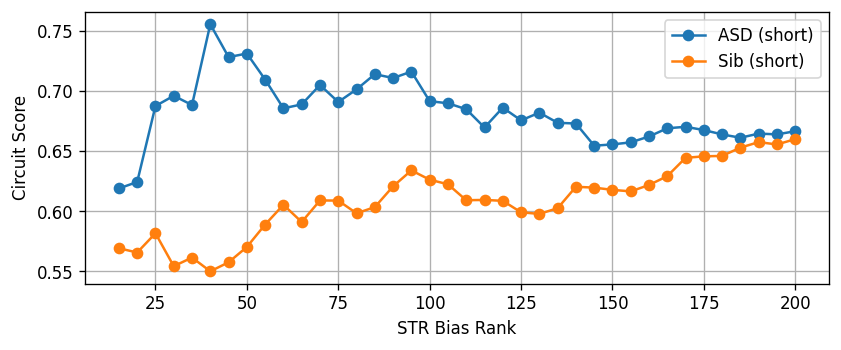

In [430]:
topNs = np.arange(200,10,-5)
x1, x2 = PlotXXX(ASD_Bias, Bias_sib_61, topNs, adj_mat, ProbMat1_short, ProbMat2_short)
plt.figure(dpi=120, figsize=(8, 3))
plt.plot(topNs, x1, label="ASD (short)", marker="o")
plt.plot(topNs, x2, label="Sib (short)", marker="o")
plt.xlabel("STR Bias Rank")
plt.ylabel("Circuit Score")
plt.grid(True)
plt.legend()

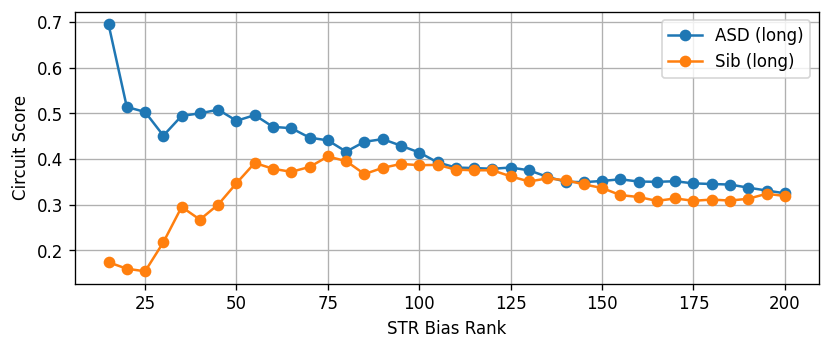

In [431]:
topNs = np.arange(200,10,-5)
x1, x2 = PlotXXX(ASD_Bias, Bias_sib_61, topNs, adj_mat, ProbMat1_long, ProbMat2_long)
plt.figure(dpi=120, figsize=(8, 3))
plt.plot(topNs, x1, label="ASD (long)", marker="o")
plt.plot(topNs, x2, label="Sib (long)", marker="o")
plt.xlabel("STR Bias Rank")
plt.ylabel("Circuit Score")
plt.grid(True)
plt.legend()

In [9]:
jw_sib = "../dat/Unionize_bias/sib.61.Z2.bias.FDR.v2.csv"
jon_sib = "../test/Jon-sibling-rank.csv"
jw_sib_df = pd.read_csv(jw_sib, index_col="STR")
jon_sib_df = pd.read_csv(jon_sib, index_col="struc")

In [10]:
jw_sib_df.head(5)

,EFFECT,REGION,Rank,Pvalue,Z_Match,qvalues
STR,,,,,,
Dentate_gyrus,0.524648,Hippocampus,1,0.001100,3.383019,0.234277
Bed_nuclei_of_the_stria_terminalis,0.388628,Pallidum,2,0.004400,2.796338,0.367388
Anterior_pretectal_nucleus,0.376148,Midbrain,3,0.011299,2.442644,0.481332
Field_CA3,0.374140,Hippocampus,4,0.006899,2.650454,0.367388
Field_CA2,0.356645,Hippocampus,5,0.006799,2.617373,0.367388


In [11]:
jon_sib_df.head(5)

,score,rank,n.gen
struc,,,
Dentate_gyrus,0.523262,1,61
Anterior_pretectal_nucleus,0.433593,2,61
Field_CA3,0.429881,3,61
Bed_nuclei_of_the_stria_terminalis,0.397829,4,61
Field_CA2,0.360531,5,61


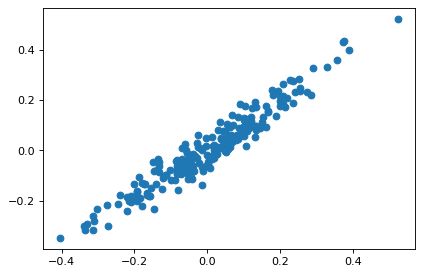

In [13]:
dat1, dat2 = [], []
for i, row in jw_sib_df.iterrows():
    dat1.append(jw_sib_df.loc[i, "EFFECT"])
    dat2.append(jon_sib_df.loc[i, "score"])
plt.scatter(dat1, dat2)

In [24]:
# Redo Sibling Bias
wwww = Fil2Dict("../test/weight-sibling61-jw.csv")
ASD_Z1 = AvgSTRZ_Weighted(ExpZ2, wwww, Method = 1)
ASD_Z1 = ASD_Z1.set_index("STR")

In [25]:
ASD_Z1.head(5)

,EFFECT,REGION,Rank
STR,,,
Dentate_gyrus,0.523262,Hippocampus,1
Anterior_pretectal_nucleus,0.433593,Midbrain,2
Field_CA3,0.429881,Hippocampus,3
Bed_nuclei_of_the_stria_terminalis,0.397829,Pallidum,4
Field_CA2,0.360531,Hippocampus,5


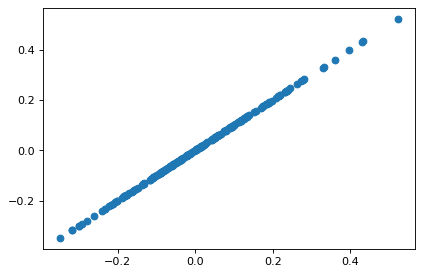

In [26]:
dat1, dat2 = [], []
for i, row in ASD_Z1.iterrows():
    dat1.append(ASD_Z1.loc[i, "EFFECT"])
    dat2.append(jon_sib_df.loc[i, "score"])
plt.scatter(dat1, dat2)

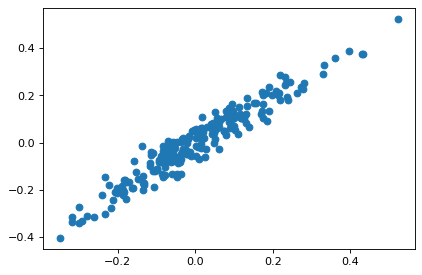

In [28]:
dat1, dat2 = [], []
for i, row in ASD_Z1.iterrows():
    dat1.append(ASD_Z1.loc[i, "EFFECT"])
    dat2.append(jw_sib_df.loc[i, "EFFECT"])
plt.scatter(dat1, dat2)